# Lending Club Case Study
*By Ashish Tondon and Uday kumar Kolluru*

### Importing external modules

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Importing the data file

In [19]:
loadData = pd.read_csv('loan.csv');

/tmp/ipykernel_7838/101281369.py:1: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  loadData = pd.read_csv('loan.csv');


In [20]:
loadData.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### Data Clean up

**Analysing data having bank or no value**

In [21]:
# Detecting missing values in all columns
info = loadData.isna().sum()

# Checking for columns where all values are null
info[info == loadData.shape[0]].count()

54

54 columns in the dataframe have all missing values. Its better to delete them as they are of no use.

In [22]:
listOfColumnsWithAllMissingValues = list(info[info == loadData.shape[0]].index)

print("Dropping because of all missing values in Columns", str(listOfColumnsWithAllMissingValues))

loadData.drop(columns=listOfColumnsWithAllMissingValues, inplace=True)

Dropping because of all missing values in Columns ['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl', 'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_

Now Checking for columns which have above 40% of missing values. And We found 3 columns with above 64% of missing value. Dropping all three columns.

In [23]:
percentageOfMissingValuesInEachColumn = (loadData.isna().sum()/loadData.shape[0]) * 100

listOfColumnsWith40perMissingValues = list(percentageOfMissingValuesInEachColumn[percentageOfMissingValuesInEachColumn > 40].index)

print("Dropping because of more then 64% missing values in Columns", str(listOfColumnsWith40perMissingValues))

loadData.drop(columns=listOfColumnsWith40perMissingValues, inplace=True)

Dropping because of more then 64% missing values in Columns ['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d']


All Entries in *delinq_amnt* and *acc_now_delinq* columns are 0. So The column is of no use we can drop them.

In [24]:
listWithZeroValues = (loadData == 0).sum().sort_values(ascending=False)

listOfColumnsWithAllZeroValues = listWithZeroValues[listWithZeroValues == loadData.shape[0]].index

loadData.drop(columns=listOfColumnsWithAllZeroValues, inplace=True)

Remaining Columns with most entries are 0

In [25]:

(loadData == 0).sum().sort_values(ascending=False)

tax_liens                     39678
chargeoff_within_12_mths      39661
collections_12_mths_ex_med    39661
out_prncp                     38577
out_prncp_inv                 38577
total_rec_late_fee            37671
pub_rec                       37601
pub_rec_bankruptcies          37339
collection_recovery_fee       35935
recoveries                    35499
delinq_2yrs                   35405
inq_last_6mths                19300
revol_bal                       994
dti                             183
total_pymnt_inv                 165
funded_amnt_inv                 129
last_pymnt_amnt                  74
total_rec_prncp                  74
total_rec_int                    71
total_pymnt                      16
last_pymnt_d                      0
open_acc                          0
last_credit_pull_d                0
policy_code                       0
initial_list_status               0
total_acc                         0
revol_util                        0
application_type            

Colums tax_liens, chargeoff_within_12_mths, collections_12_mths_ex_med mostly have 0 and missing values only. So better to drop them. As these are of no use.

In [26]:
# loadData[["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"]].isna().sum(), (loadData[["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"]] == 0).sum()
loadData.drop(columns=["tax_liens", "chargeoff_within_12_mths", "collections_12_mths_ex_med"], inplace=True)

In [27]:
loadData.groupby("initial_list_status").id.count()

initial_list_status
f    39717
Name: id, dtype: int64

**We found following details:**
1. Column 'policy_code' repeating value '1' in all rows. It means all uses "Publicly available policy".
2. Column 'application_type' repeating value 'INDIVIDUAL' in all rows. It means all borrows in the dataset are Individual borrowers.
3. Column 'pymnt_plan' repeating value 'n' in all rows. It means all borrows in the dataset opting for same borrowing plan.
4. Column 'initial_list_status' repeating value 'f' in all rows. It means all borrows in the dataset have same initial listing status.

As all rows have same value for columns policy_code, application_type, pymnt_plan, initial_list_status. And We already noted the informations these columns can provide above. Now we can drop these columns as well. As these column can not provide any other information in further analysis.

In [28]:
loadData.drop(columns=["policy_code", "application_type", "pymnt_plan", "initial_list_status"], inplace=True)

In [29]:
loadData.shape

(39717, 45)

### Data Analysis

In [30]:
# (loadData == 1).sum().sort_values(ascending=False)
# policy_code = 1, application_type = INDIVIDUAL, pymnt_plan = n, initial_list_status = f
# loadData.groupby("issue_d").count()

loadData.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'url', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util',
       'total_acc', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies'],
      dtype='object')

In [101]:
# loadData.groupby("loan_status").id.count()

# loadData[["loan_status", "loan_status"]].plot.bar()
# loadData.grade.value_counts().sort_index().values 
# 
table = pd.pivot_table(data=loadData, index=["loan_status", "grade"], values=["id"], aggfunc="count")

newtab = table[table.index.get_level_values('loan_status') == "Charged Off"]
# table.index[:,0]
# newtab = table.loc[table.index[:,0] == "Charged Off"]

newtab["Total"] = loadData.grade.value_counts().sort_index().values 

newtab["percent"] = newtab.apply(lambda row: round((row.id/row.Total) * 100,2), axis=1)

newtab.reset_index(inplace=True)

newtab

/tmp/ipykernel_7838/2823864085.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtab["Total"] = loadData.grade.value_counts().sort_index().values
/tmp/ipykernel_7838/2823864085.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newtab["percent"] = newtab.apply(lambda row: round((row.id/row.Total) * 100,2), axis=1)


,loan_status,grade,id,Total,percent
0,Charged Off,A,602,10085,5.97
1,Charged Off,B,1425,12020,11.86
2,Charged Off,C,1347,8098,16.63
3,Charged Off,D,1118,5307,21.07
4,Charged Off,E,715,2842,25.16
5,Charged Off,F,319,1049,30.41
6,Charged Off,G,101,316,31.96


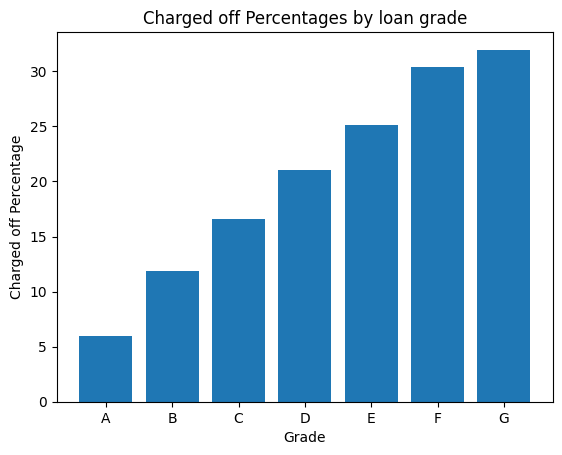

In [109]:
plt.bar(data=newtab, x="grade", height="percent")
plt.xlabel("Grade")
plt.ylabel("Charged off Percentage")
plt.title("Charged off Percentages by loan grade")
# plt.xticks(xticks="Grade")
# plt.xticks(xticks="Percentage")
plt.show()

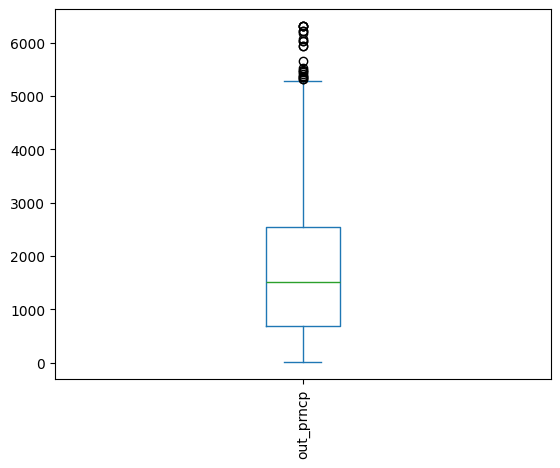

In [31]:

loadData.loc[loadData.loan_status == "Current"].out_prncp.plot.box()

plt.xticks(rotation=90)
# , "loan_status"
# fig, ax = plt.subplots()

# ax.bar(x=test.index, height=test.values, )

# ax.set_title('Number of penguins by sex')
# ax.legend()

plt.show()


In [32]:
loadData.loc[loadData.loan_status == "Current"].groupby(["out_prncp","out_prncp_inv"]).id.count()


out_prncp  out_prncp_inv
10.26      10.26            1
11.91      11.91            1
13.28      13.28            1
19.12      19.09            1
27.41      27.41            1
                           ..
6219.16    6219.16          1
6307.15    6298.11          1
6307.37    6307.37          1
6308.37    6276.75          1
6311.47    6306.96          1
Name: id, Length: 1138, dtype: int64

In [33]:
loadData.annual_inc.max()

6000000.0

In [34]:
loadData.annual_inc.describe()

count    3.971700e+04
mean     6.896893e+04
std      6.379377e+04
min      4.000000e+03
25%      4.040400e+04
50%      5.900000e+04
75%      8.230000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64